# Pitching Analysis Script

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pand
import plotly.graph_objects as go

In [25]:
pitcher_name = 'Everett-Wonson'
df = pand.read_excel('Pitching Data.xlsx', usecols="A:K", sheet_name=pitcher_name)

In [26]:
    
x_loc = {1:1, 2:2, 3:3, 4:1,5:2, 6:3,7:1,8:2,9:3,10:1,11:2,12:3,13:4,
        14:4,15:4,16:4,17:4,18:3,19:2,20:1,21:0,22:0,23:0,24:0,25:0}
y_loc = {1:3, 2:3, 3:3, 4:2,5:2, 6:2,7:1,8:1,9:1,10:4,11:4,12:4,13:4,
        14:3,15:2,16:1,17:0,18:0,19:0,20:0,21:0,22:1,23:2,24:3,25:4}

# Pitch Usage Data

In [27]:
def usage(pitch_type, dataframe):
    num_pitches = dataframe[dataframe['Type'] == pitch_type].size
    return num_pitches

In [28]:
def usage_per(pitch_type, dataframe):
    total_usage = usage(pitch_type, dataframe)
    usage_per = total_usage/dataframe.size
    return usage_per

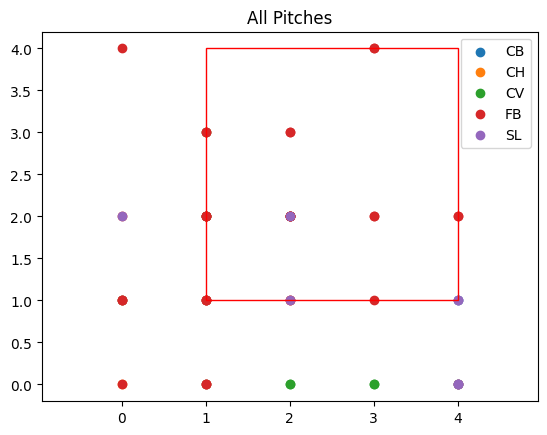

In [29]:
def plot_pitches(dataframe, title):
    groups = dataframe.groupby('Type')
    
    for name, group in groups:
        x = group['Location'].map(x_loc)
        y = group['Location'].map(y_loc)
        locs = pand.DataFrame([x,y])
        plt.scatter(x, y, label=name)
        #heatmap = sn.heatmap(data = locs)

    rect = patches.Rectangle((1,1), 3, 3, fill=False, color="red")
    plt.gca().add_patch(rect)
    plt.axis('equal')
    plt.legend()
    plt.title(title)
    plt.show()
plot_pitches(df, "All Pitches")

# Velocity Data

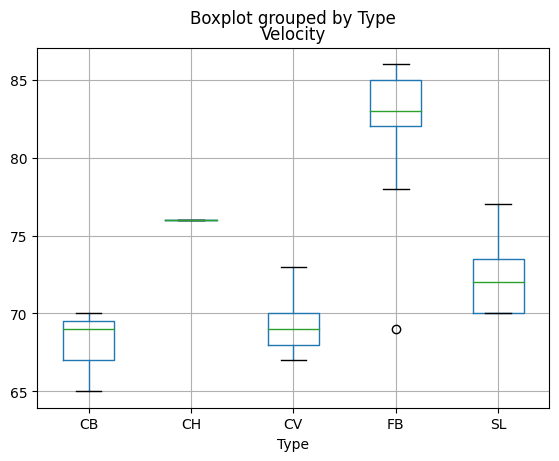

In [30]:
def velo_pt(dataframe):

    d = {'Velocity' : dataframe.loc[:,"Velocity"], 'Type' : dataframe.loc[:,"Type"]}
    
    frame = pand.DataFrame(data = d)
    
    frame.head()
    
    frame.boxplot(column='Velocity', by='Type')
velo_pt(df)

# Pitch charts for all pitches in 2022 season by pitch type

# Strike % by Pitch Type

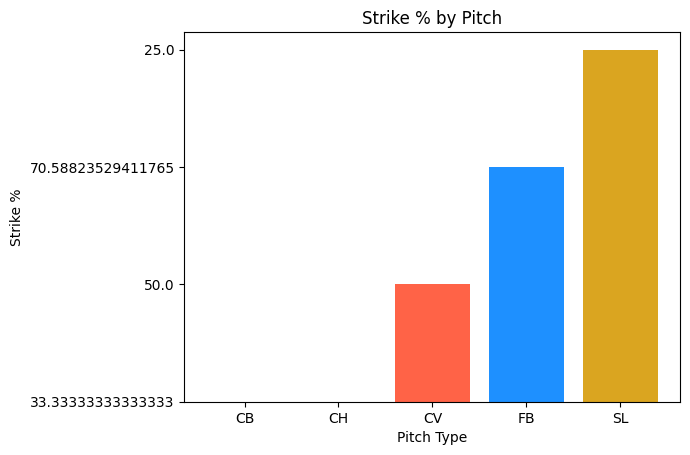

In [31]:
def strike_percentage(type, df):
    all_type = df[df['Type'] == type]
    all_strikes = all_type[all_type['Call'] == 'S']
    if not all_type.empty:
        strike_percent = all_strikes.size/all_type.size
    else:
        strike_percent = None
    return strike_percent
def strikes_by_ptype(df):
    groups = df.groupby("Type")
    pitchList = list()
    for name, group in groups:
        pitchList.append([name, strike_percentage(name, df)*100])
    strike_p = np.asarray(pitchList)
    plt.bar(strike_p[:,0],strike_p[:,1], color=['dodgerblue', 'goldenrod', 'tomato'])
    plt.title('Strike % by Pitch')
    plt.ylabel('Strike %')
    plt.xlabel('Pitch Type')
    plt.show()
strikes_by_ptype(df)

# Pitch charts for all pitches in 2022 season by count

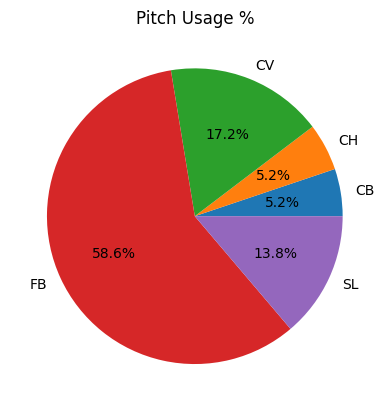

In [32]:
def total_usage(df):
    groups = df.groupby("Type")
    pitchList = list()
    for name, group in groups:
        pitchList.append([name, usage(name, df)])
    pitch_usage = np.asarray(pitchList)
    plt.pie(pitch_usage[:,1], labels=pitch_usage[:,0], autopct='%1.1f%%')
    plt.title("Pitch Usage %")
    plt.show()
total_usage(df)

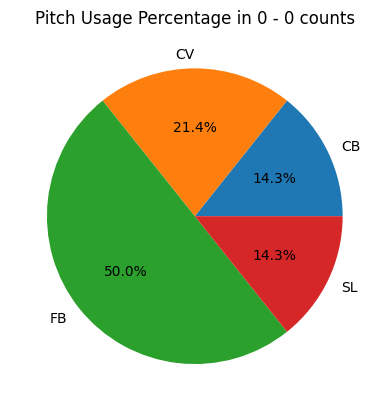

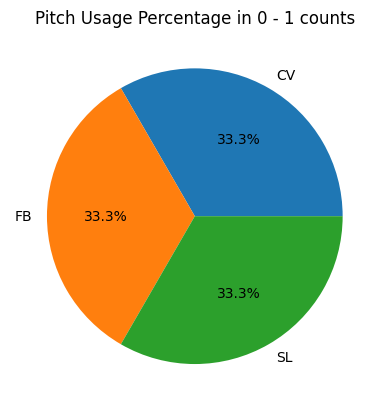

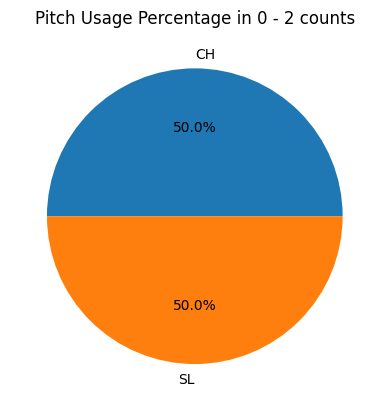

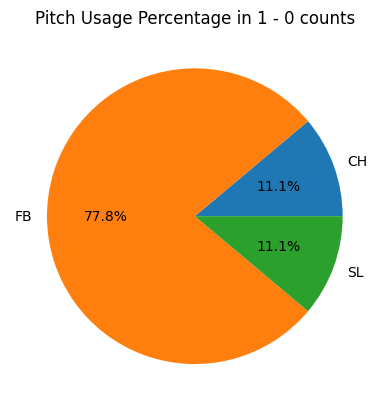

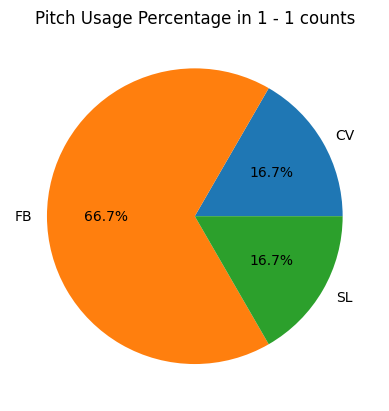

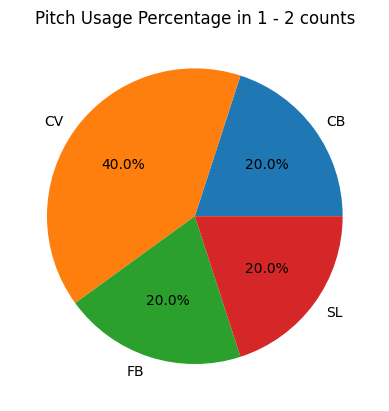

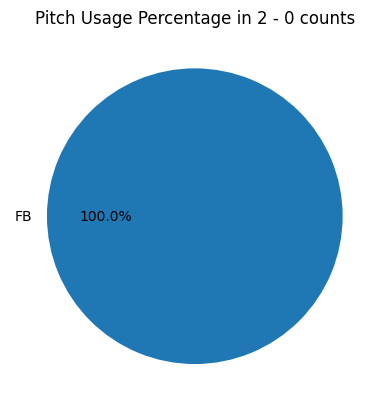

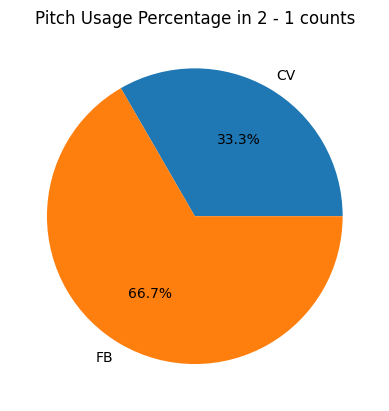

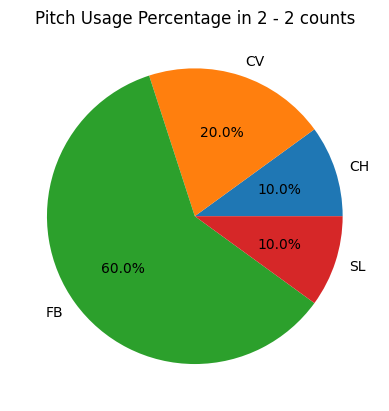

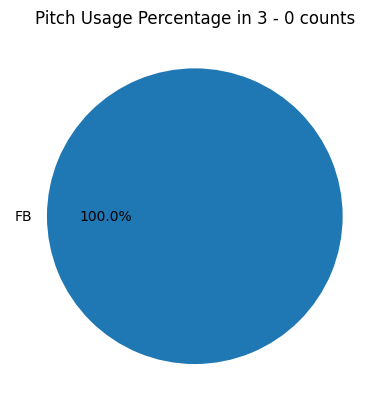

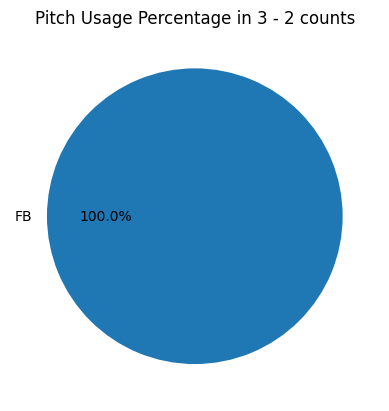

In [33]:
def filter_by_count(balls, strikes, df):
    count = df[df['Balls'] == balls]
    count = count[count['Strikes'] == strikes]
    return count
def usage_percentage_by_count(balls, strikes, df):
    count = filter_by_count(balls, strikes, df)
    if not count.empty:
        groups = count.groupby("Type")
        pitchList = list()
        for name, group in groups:
            pitchList.append([name, usage(name, count)])
        pitch_usage = np.asarray(pitchList)
        plt.pie(pitch_usage[:,1], labels=pitch_usage[:,0], autopct='%1.1f%%')
        plt.title("Pitch Usage Percentage in %s - %s counts"%(balls, strikes))
        plt.show()
def usage_all_counts(df):
    for balls in range(0,4):
        for strikes in range(0,3):
            filtered = df
            usage_percentage_by_count(balls, strikes, filtered)
usage_all_counts(df)

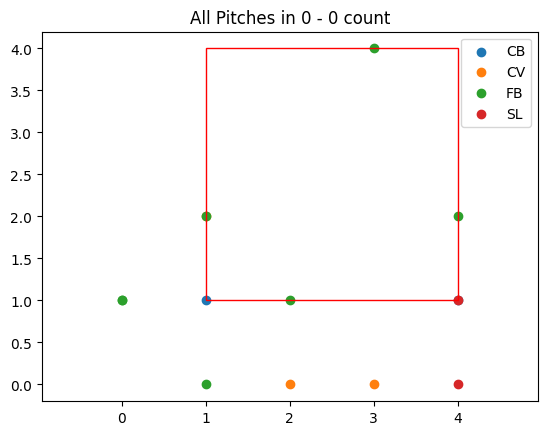

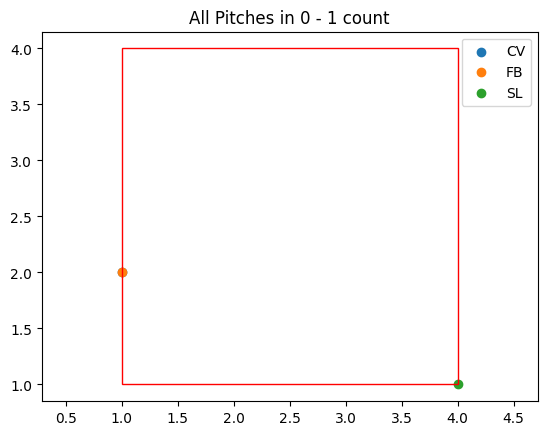

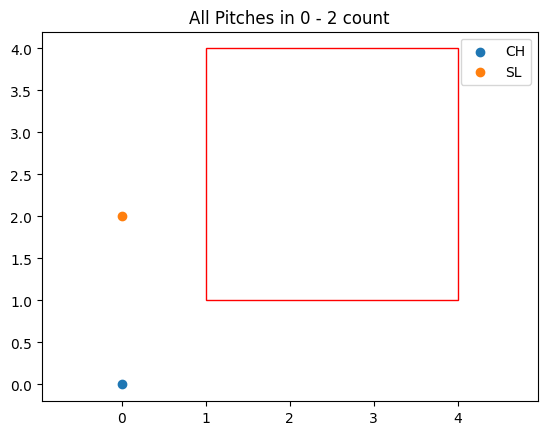

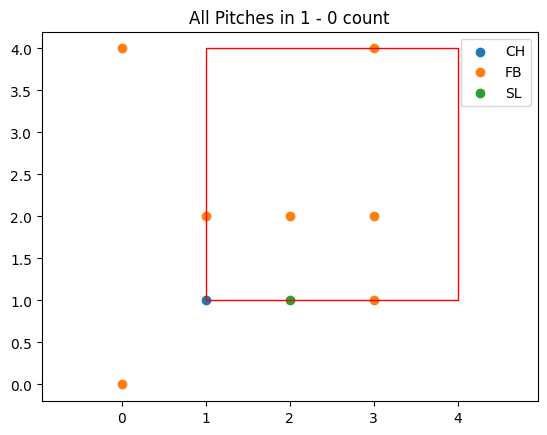

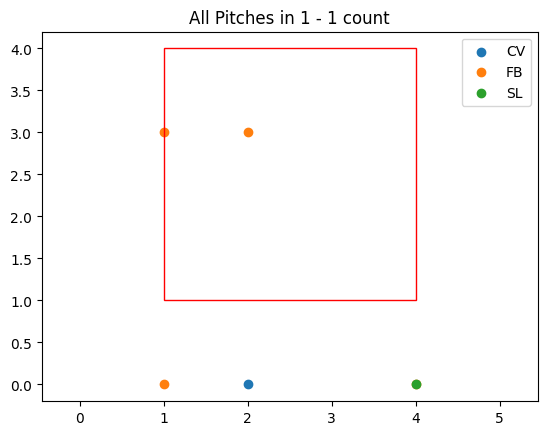

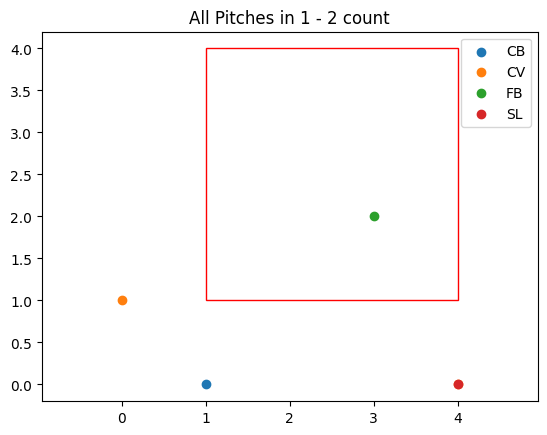

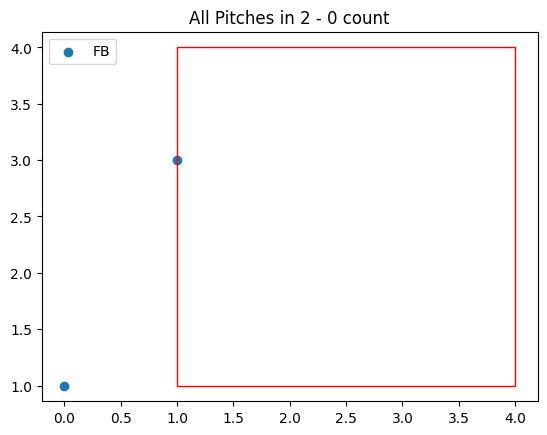

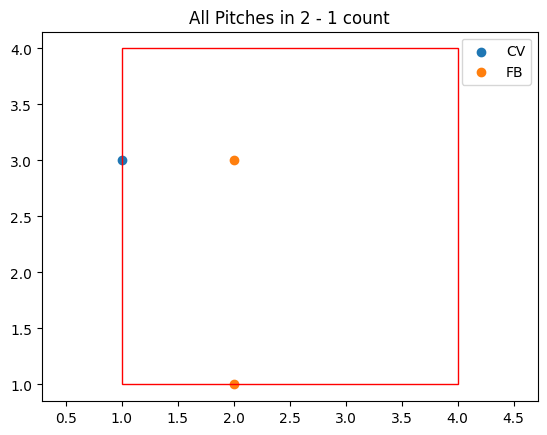

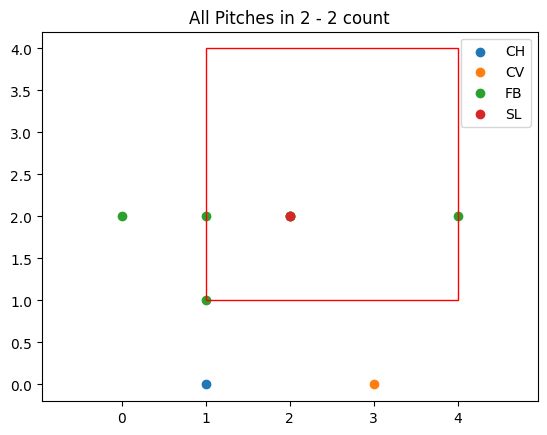

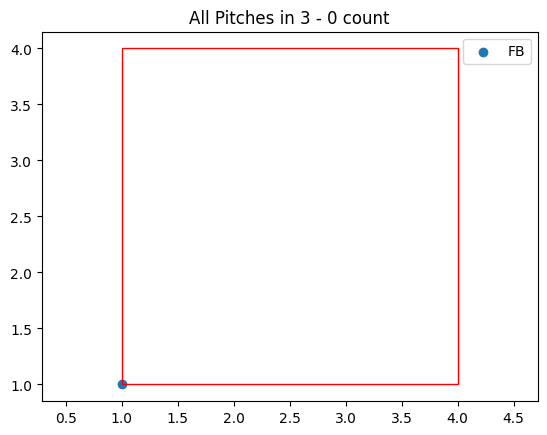

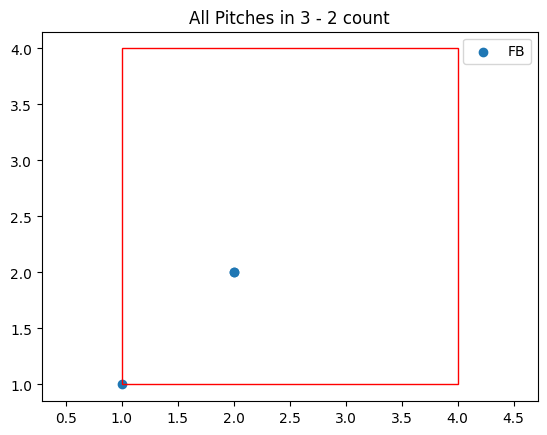

In [34]:
def plot_all_pitches(df):
    for balls in range(0,4):
        for strikes in range(0,3):
            filtered = filter_by_count(balls, strikes, df)
            if not filtered.empty:
                title = "All Pitches in %d - %d count"%(balls, strikes)
                plot_pitches(filtered, title)
plot_all_pitches(df)
        

# Whiff% by pitch type

In [35]:
def whiff_percentage(type, df):
    all_type = df[df['Type'] == type]
    all_type = df[df['Live'] == 'Y']
    all_swinging = all_type[all_type['Swinging'] == 'Y']
    all_whiffs = all_swinging[all_swinging['EV'].isna()]
    if not all_swinging.empty:
        whiff_percent = all_whiffs.size/all_swinging.size
    else:
        whiff_percent = None
    return whiff_percent

## CSW%

In [36]:
def csw(type, dataframe):
    csw_per = -1
    if(type == "ALL"):
        all_swinging_strikes = dataframe[(dataframe['Swinging'] == 'Y') & (dataframe['Outcome'].isna())]
        all_swinging_strikes = all_swinging_strikes[all_swinging_strikes['Live'] == 'Y']
        all_called_strikes = dataframe[(dataframe['Call'] == 'S') & (dataframe['Swinging'] == 'N')]
        all_called_strikes = all_called_strikes[all_called_strikes['Live'] == 'Y']
        total_strikes = all_swinging_strikes.size + all_called_strikes.size
        csw_per= total_strikes/dataframe.size
    else:
        of_pitch_type = dataframe[dataframe['Type'] == type]
        all_swinging_strikes = of_pitch_type[(of_pitch_type['Swinging'] == 'Y') & (of_pitch_type['Outcome'].isna())]
        all_called_strikes = of_pitch_type[(of_pitch_type['Call'] == 'S') & (of_pitch_type['Swinging'] == 'N')]
        total_strikes = all_swinging_strikes.size + all_called_strikes.size
        if not of_pitch_type.empty:
            csw_per= total_strikes/of_pitch_type.size
        else:
            csw_per = None
    return csw_per

# Batted Ball Profiles

## FB/GB/LD Percentages

### All Pitch Types

In [37]:
def balls_in_play(dataframe):
    fb = dataframe[dataframe.Outcome.eq('FB')]
    gb = dataframe[dataframe.Outcome.eq('GB')]
    ld = dataframe[dataframe.Outcome.eq('LD')]
    
    total_size = fb.size + gb.size + ld.size
    fb_per = fb.size/total_size
    gb_per = gb.size/total_size
    ld_per = ld.size/total_size
    return fb_per, gb_per, ld_per

### By Pitch Type

In [38]:
def fb_gb_ld_by_pitch_type(dataframe, pitch_type):
    dataframe = dataframe[dataframe['Type'] == pitch_type]
    fb = dataframe[dataframe.Outcome.eq('FB')]
    gb = dataframe[dataframe.Outcome.eq('GB')]
    ld = dataframe[dataframe.Outcome.eq('LD')]
    
    total_size = fb.size + gb.size + ld.size
    fb_per = fb.size/total_size
    gb_per = gb.size/total_size
    ld_per = ld.size/total_size
    return fb_per, gb_per, ld_per

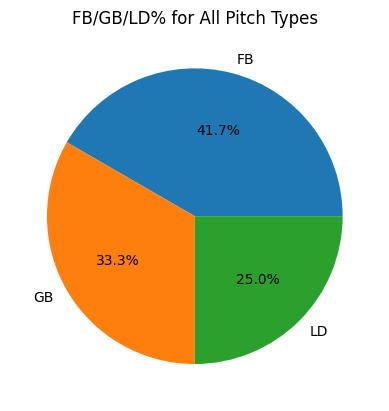

In [39]:
def fb_gb_ld(df):
    fb, gb, ld = balls_in_play(df)
    y = np.array([fb, gb, ld])
    plt.pie(y, labels=['FB', 'GB','LD'], autopct='%1.1f%%')
    plt.title("FB/GB/LD% for All Pitch Types")
    plt.show()
fb_gb_ld(df)

## By Pitch

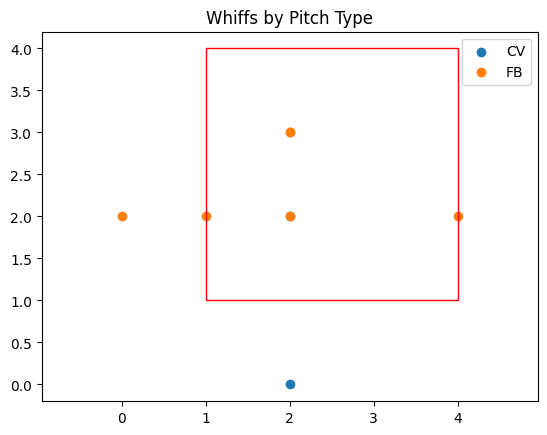

In [40]:
def plot_whiffs(df):
    whiff = df[df['Swinging'] == 'Y']
    whiff = whiff[whiff['Outcome'].isna()]

    plot_pitches(whiff, "Whiffs by Pitch Type")
plot_whiffs(df)

# MLB Comps

In [41]:
mlb_pitchers_2021 = pand.read_excel('mlb_pitchers_2021.xlsx', usecols="A:J")

window = 10

In [42]:
def sim_fb_usage(dataframe, window):
    fb_usage = (usage('FB', dataframe)/dataframe.size)*100
    sim_mlb = mlb_pitchers_2021[mlb_pitchers_2021['fastball'].between(fb_usage-window, fb_usage+window)]
    return sim_mlb

In [43]:
def sim_ch_usage(dataframe, window):
    ch_usage = (usage('CH', dataframe)/dataframe.size)*100
    sim_mlb = mlb_pitchers_2021[mlb_pitchers_2021['changeup'].between(ch_usage-window, ch_usage+window)]
    return sim_mlb

In [44]:
def sim_sl_usage(dataframe, window):
    sl_usage = (usage('SL', dataframe)/dataframe.size)*100
    sim_mlb = mlb_pitchers_2021[mlb_pitchers_2021['slider'].between(sl_usage-window, sl_usage+window)]
    return sim_mlb

## MLB Pitchers With Similar Pitch Usage Profiles

In [45]:
def construct_savant_url(dataframe):
    for index, row in dataframe.iterrows():
        print("Baseball Savant URL for {:s} {:s}: ".format(row['first'], row['last']))
        first_name = row['first'].lower().strip()
        last_name = row['last'].lower().strip()
        id = str(row['pitcher'])
        url = 'https://baseballsavant.mlb.com/savant-player/' + first_name +'-' + last_name + '-' + id + '?stats=statcast-r-pitching-mlb'
        print(url)


In [46]:
mlb_comps= sim_fb_usage(df, window).merge(sim_ch_usage(df, window), on='pitcher', how='inner').merge(sim_sl_usage(df, window), on='pitcher', how='inner', sort=True)
mlb_comps = mlb_comps[['last', 'first','pitcher', 'fastball', 'slider', 'changeup', 'curve', 'splitter']]
print("Our pitcher's usage profile: FB: {: 0.2f}%, SL: {: 0.2f}%, CH: {: 0.2f}%\nComparable Pitchers in MLB:".format(usage('FB', df)/df.size*100, usage('SL', df)/df.size*100, usage('CH', df)/df.size*100))
print(mlb_comps)
print()
construct_savant_url(mlb_comps)

Our pitcher's usage profile: FB:  58.62%, SL:  13.79%, CH:  5.17%
Comparable Pitchers in MLB:
             last       first  pitcher  fastball  slider  changeup  curve  \
0            Happ        J.A.   457918      53.9    15.1      12.1    1.3   
1          Wilson      Justin   458677      58.1     6.1       0.0    0.0   
2           Soria      Joakim   465657      59.3    21.3      14.4    4.3   
3          Espino       Paolo   502179      55.2    16.4       4.1   24.2   
4       Armstrong       Shawn   542888      55.2    11.8       0.0    0.0   
5        Odorizzi        Jake   543606      55.2     7.3       0.0    5.2   
6          Miller      Shelby   571946      63.4    14.3       0.0    0.0   
7         Gausman       Kevin   592332      52.7     6.2       5.6    0.0   
8          Plutko        Adam   592644      49.9    10.2       0.0    7.0   
9          Stanek        Ryne   592773      59.7    18.5       0.0    0.0   
10        Taillon     Jameson   592791      49.5    16.3   